In [1]:
%load_ext autoreload
%autoreload 2

import os
from jax import config
config.update("jax_enable_x64", True)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

import tensorflow_datasets as tfds  # TFDS for MNIST
import tensorflow as tf             # TensorFlow operations

# from image_distribution_models import PixelCNN

from cleanplots import *
import jax.numpy as np
from jax.scipy.special import logsumexp
import numpy as onp


2024-01-26 14:03:51.239956: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 14:03:51.767555: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-26 14:03:51.767624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-01-26 14:03:51.767631: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [3]:
print(np.std(data.flatten()),
        np.std(uniform_data.flatten()))

77.8104 73.58403402923176


: 

Text(0.5, 1.0, 'random MLP projection of data')

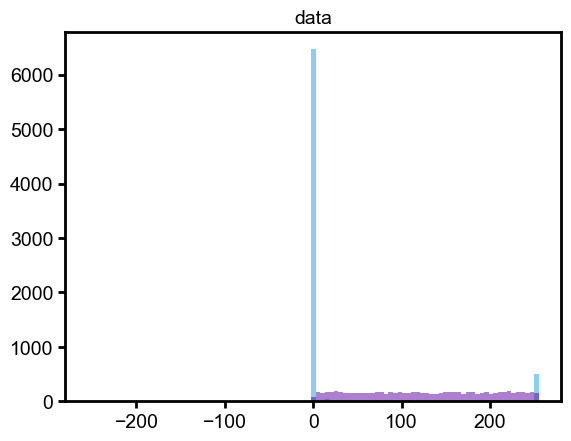

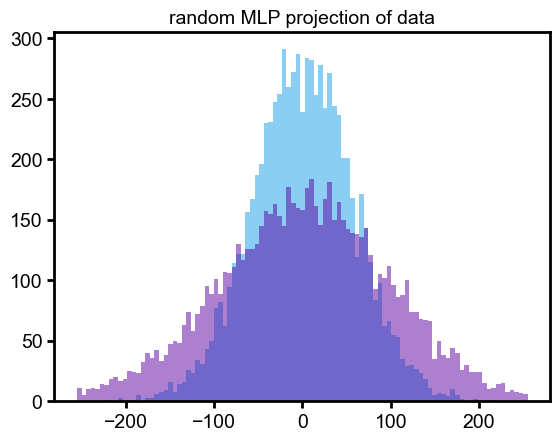

In [2]:
#MNIST
(patches, _), (test_patches, _) = tf.keras.datasets.mnist.load_data()
patches = patches.astype(np.float32)[:1000]
data = patches.reshape(patches.shape[0], -1)

uniform_data = onp.random.uniform(data.min(), data.max(), size=data.shape)

# generate data of the same shape, but with random IID draws from an exponential distribution
# data = onp.random.exponential(1, size=(1000, 784))

# create a matrix with entries of random gaussian variables
# with mean 0 and variance 1

matrix1 = onp.random.normal(0, 1, (784, 784))
matrix2 = onp.random.normal(0, 1, (784, 784))
# normalize the columns of the matrix
matrix1 = matrix1 / np.linalg.norm(matrix1, axis=0, keepdims=True)
matrix2 = matrix2 / np.linalg.norm(matrix2, axis=0, keepdims=True)
# make relu activation
relu = lambda x: np.maximum(0, x)

out = relu(data @ matrix1 ) @ matrix2
out_uniform = relu(uniform_data @ matrix1 ) @ matrix2

# plot histogram of data
fig, ax = plt.subplots()
bins = np.linspace(-255, 255, 100)
_ = ax.hist(data[:10].flatten(), bins=bins, alpha=0.5, label="MNIST")
_ = ax.hist(uniform_data[:10].flatten(), bins=bins, alpha=0.5, label="Uniform")
ax.set_title("data")

# plot histogram of out
fig, ax = plt.subplots()
_ = ax.hist(out[:10].flatten(), bins=bins, alpha=0.5, label="MNIST")
_ = ax.hist(out_uniform[:10].flatten(), bins=bins, alpha=0.5, label="Uniform")
ax.set_title("random linear projection of data")
ax.set_title("random MLP projection of data")


